<a href="https://colab.research.google.com/github/Santhosh-1801/MLI-Feynn-Labs/blob/main/IndianCarsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
%matplotlib inline


### **Data Loading and Cleaning**

In [ ]:
df= pd.read_csv("/content/sample_data/cars_ds_final_2021.csv")


In [ ]:
df.sample(8)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
85,85,Premier,Rio,Lx,"Rs. 7,39,000",1489 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,1016,Hyundai,Grand I10,1.2 Kappa Vtvt Sportz Dual Tone,"Rs. 6,40,537",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,Renault,Kwid,Climber 1.0 Mt,"Rs. 4,54,490",999 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,1132,Hyundai,Grand I10 Nios,Magna 1.2 Crdi,"Rs. 6,75,090",1186 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,93,Toyota,Etios Liva,Dual Tone V,"Rs. 5,97,700",1197 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,540,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,4.0,4.0,AWD (All Wheel Drive),In-line,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
301,301,Renault,Lodgy,Stepway Rxz 110Ps 8-Seater,"Rs. 12,11,599",1461 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
975,975,Lamborghini,Aventador,Lp 700-4,"Rs. 4,78,93,943",6498 cc,12.0,4.0,4WD,V,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


### **Important Features**

In [ ]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

In [ ]:
##Cleaning the Data
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)
df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [ ]:
df.sample(6)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,...,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
818,Maruti Suzuki,Ertiga,Maruti Suzuki Ertiga,Vxi Cng (Cng +,MUV,CNG + Petrol,Injection,Manual,FWD (Front Wheel Drive),1462,...,180,45.0,1685.0,4265.0,1695.0,5,7,2740.0,2,12427
757,Honda,Amaze,Honda Amaze,Exclusive Edition Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1498,...,200,35.0,1501.0,3995.0,1695.0,4,5,2470.0,2,12684
1009,Maruti Suzuki,Baleno,Maruti Suzuki Baleno,1.2 Delta Dualjet,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1197,...,115,37.0,1510.0,3995.0,1745.0,5,5,2520.0,2,10267
931,Audi,A6,Audi A6,Technology 45 Tfsi,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1984,...,370,73.0,1455.0,4933.0,1874.0,4,5,2912.0,8,83190
401,Toyota,Innova Crysta,Toyota Innova Crysta,2.7 Gx Mt 8 Str,MUV,Petrol,Injection,Manual,RWD (Rear Wheel Drive),2755,...,360,55.0,1795.0,4735.0,1830.0,5,8,2750.0,7,20972
577,Jaguar,F-Type,Jaguar F-Type,2.0L Coupe,Coupe,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),1997,...,400,63.0,1311.0,4482.0,1923.0,2,2,2622.0,2,127296


In [ ]:
df.isnull().sum()

make            0
model           0
car             0
variant         0
body_type       0
fuel_type       0
fuel_system     1
type            0
drivetrain      1
displacement    0
cylinders       0
mileage         0
power           0
torque          0
fuel_tank       0
height          0
length          0
width           0
doors           0
seats           0
wheelbase       0
airbags         0
price           0
dtype: int64

In [ ]:
df.dropna(subset = ['drivetrain'], inplace=True)

In [ ]:
df.dropna(subset=['fuel_system'],inplace=True)

In [ ]:
df.isnull().sum()

make            0
model           0
car             0
variant         0
body_type       0
fuel_type       0
fuel_system     0
type            0
drivetrain      0
displacement    0
cylinders       0
mileage         0
power           0
torque          0
fuel_tank       0
height          0
length          0
width           0
doors           0
seats           0
wheelbase       0
airbags         0
price           0
dtype: int64

### **Taking any one car and finding its features**

In [ ]:
df[df.model =='Corolla Altis']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,...,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
428,Toyota,Corolla Altis,Toyota Corolla Altis,G Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,...,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,23030
429,Toyota,Corolla Altis,Toyota Corolla Altis,G At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,...,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,3,25284
430,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1798,...,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,26348
431,Toyota,Corolla Altis,Toyota Corolla Altis,Gl Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,...,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,27104
432,Toyota,Corolla Altis,Toyota Corolla Altis,G Diesel,Sedan,Diesel,Injection,Manual,FWD (Front Wheel Drive),1364,...,205,43.0,1475.0,4620.0,1775.0,4,5,2700.0,3,24794
433,Toyota,Corolla Altis,Toyota Corolla Altis,Vl At Petrol,Sedan,Petrol,Injection,Automatic,FWD (Front Wheel Drive),1798,...,173,55.0,1475.0,4620.0,1775.0,4,5,2700.0,7,28266


### **It is observed that there are six variants in this car**

### **Distribution of dataset**

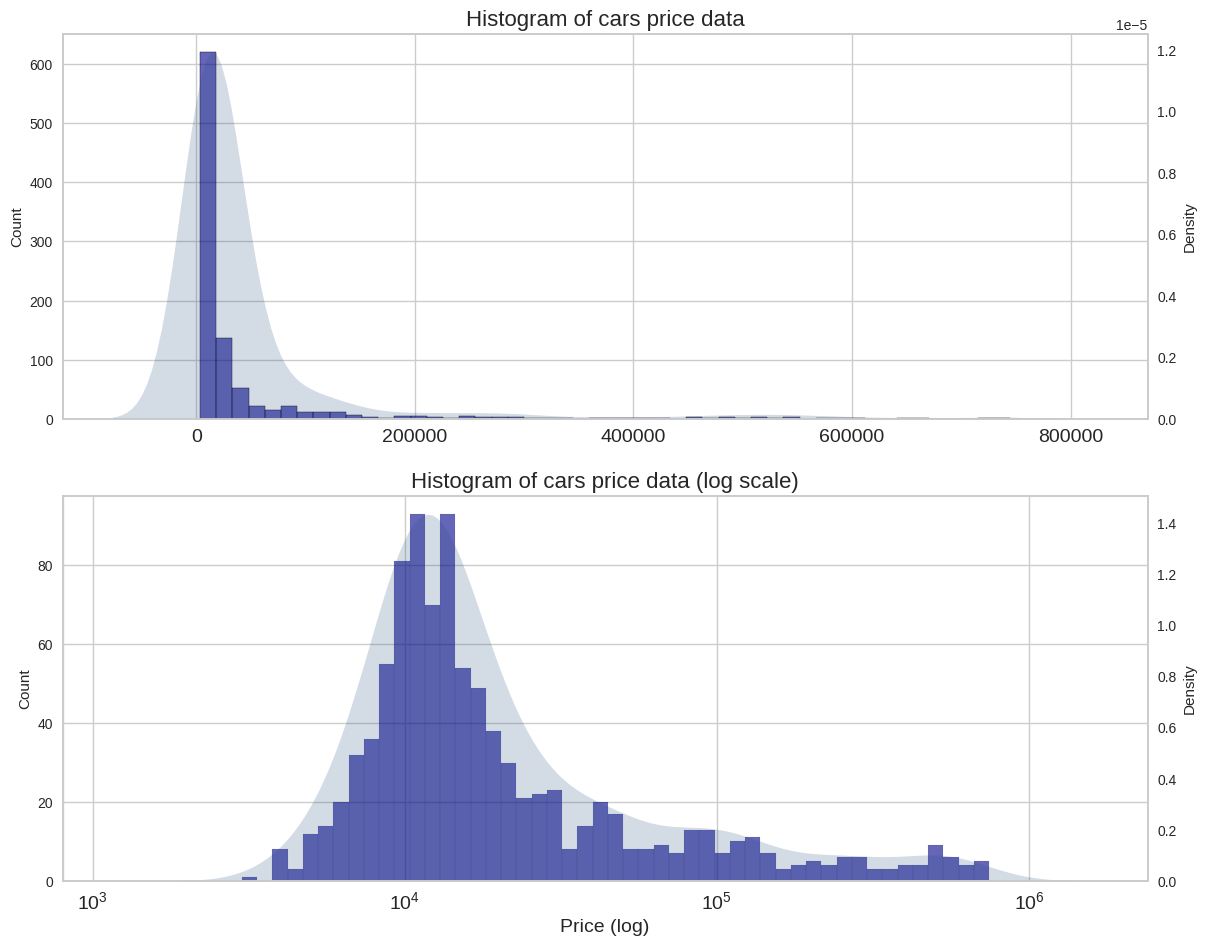

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

### **Observation: We can see that price range peaks at between 10^4 and 10^5**

### **Box plot of Price**

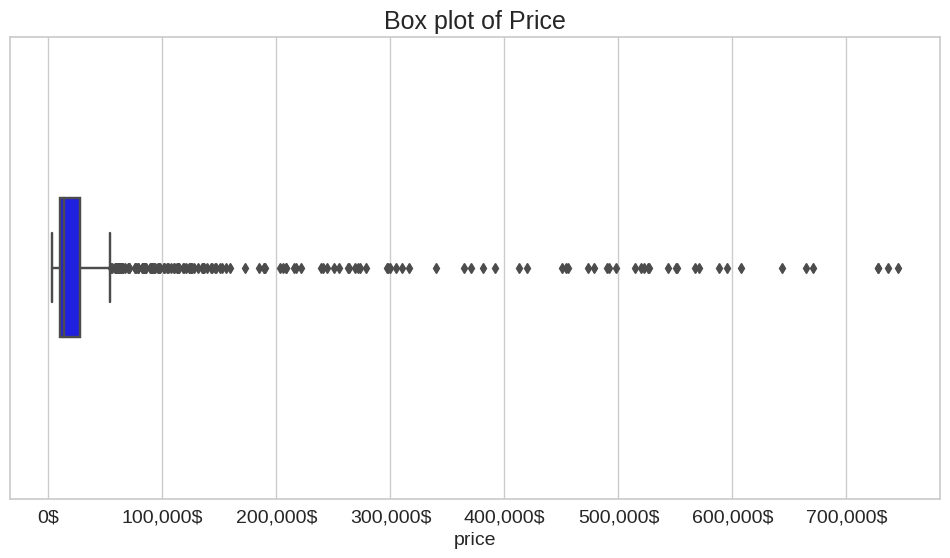

In [ ]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

### **Cars by Car Body Type**

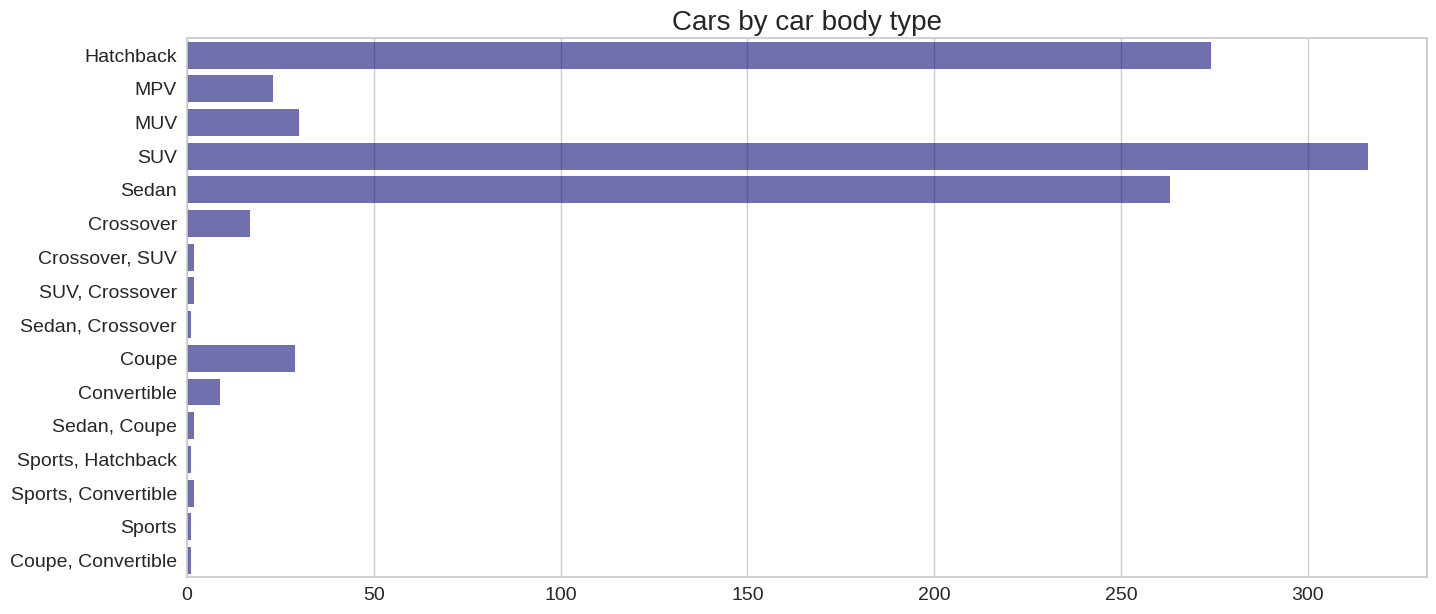

In [ ]:

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

### **Observation:SUV's Sedans and hatchbacks seems to be the dominating car types**

### **Box plot of price of every body type**

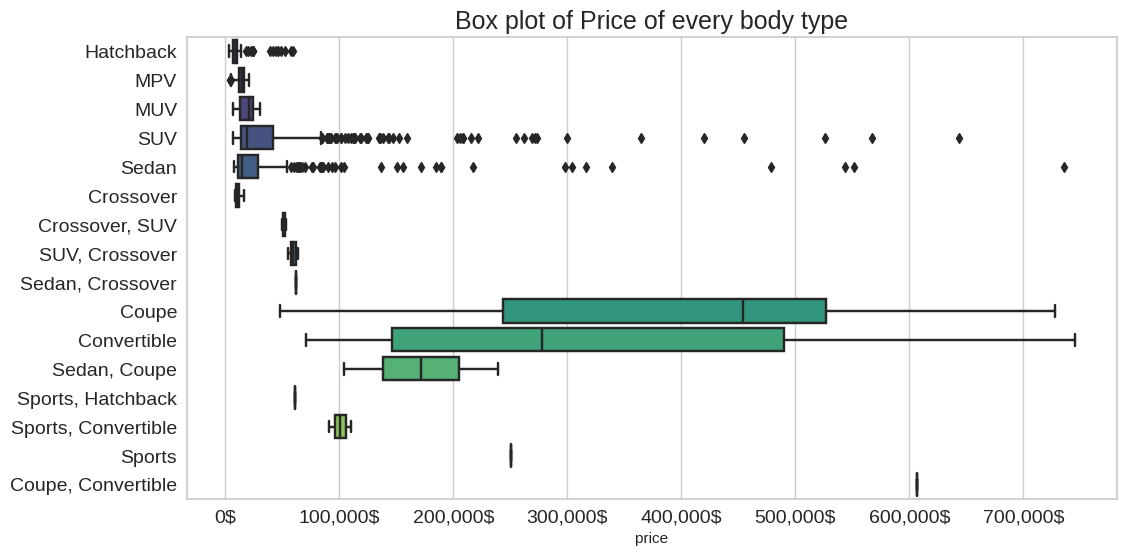

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

### **Observation:Car body affects the price**

### **Checking car by fuel type**

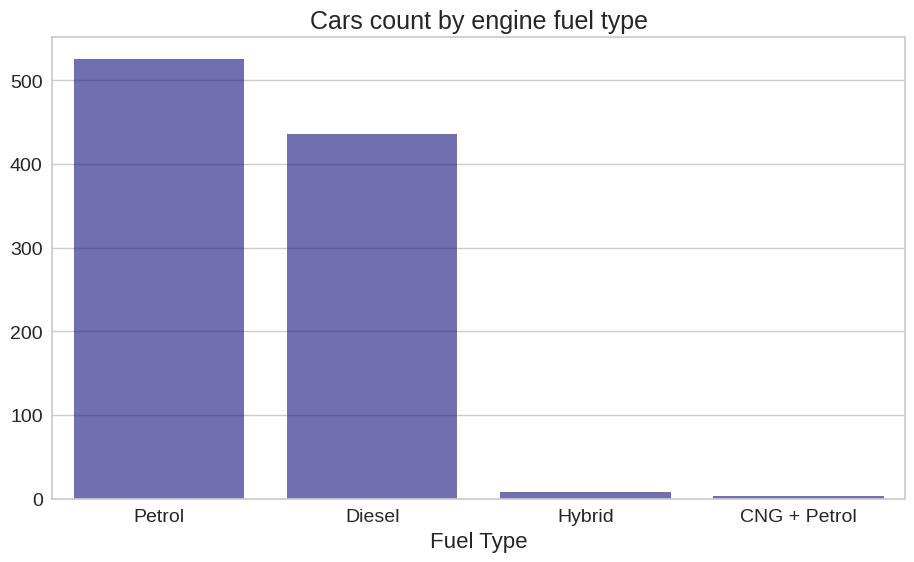

In [ ]:

plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

### **Observation:Most cars seems to be run on Petrol or Diesel**

### **Car by Engine Size**

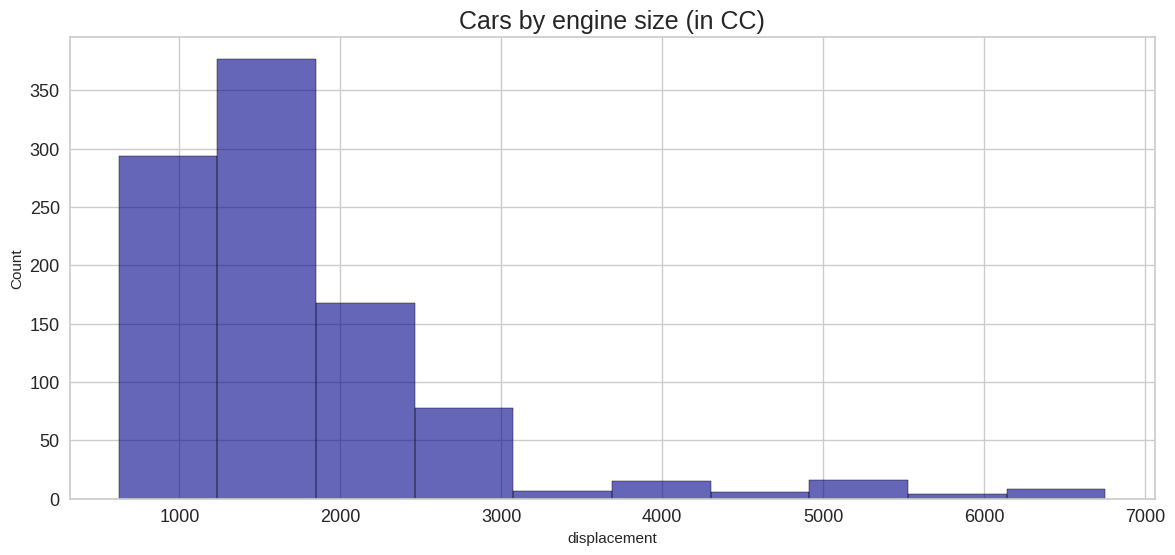

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### **Most of cars have engine size in the 1000:2000cc range**

### **Horsepower of car**

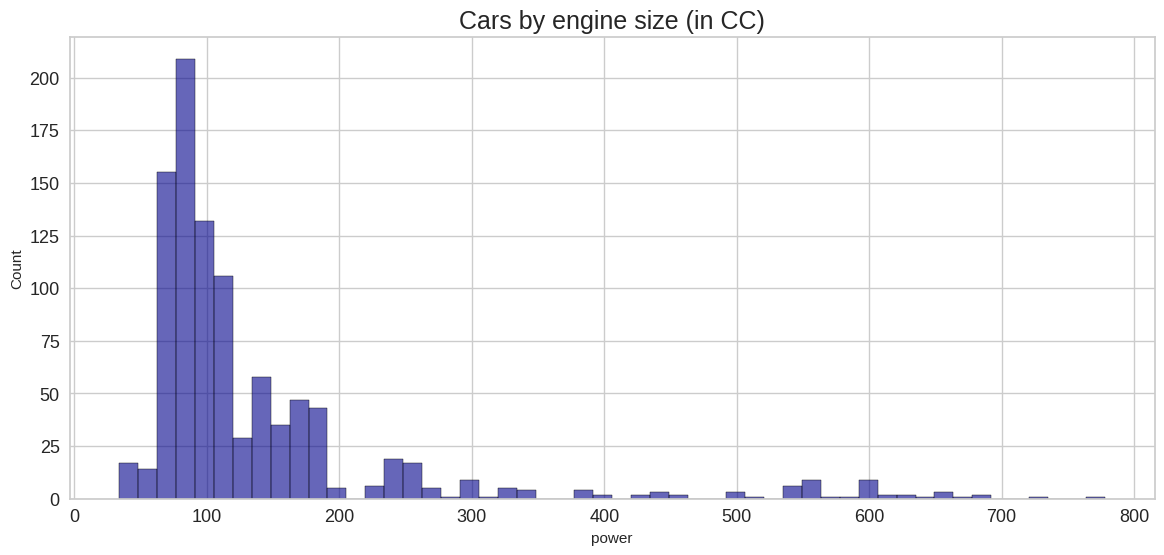

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

### **Horsepower and Price Relation**

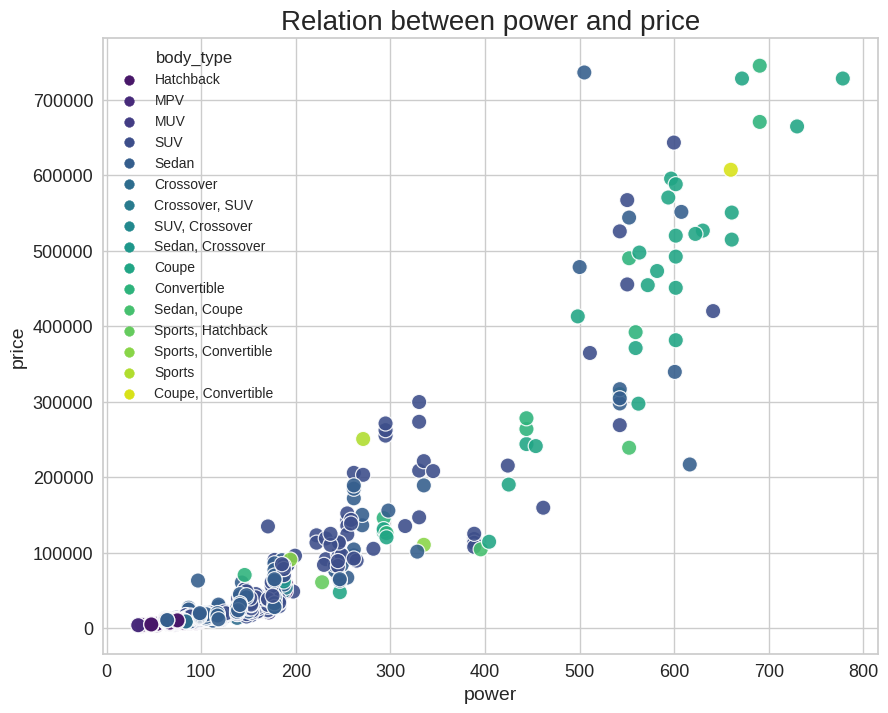

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

### **Horsepower of car seems to be highly related to car price but car body type seems a little bit blurry but hatchbacks seems to be the body type with the least horsepower and price**

### **Relation between Mileage and Price**

<ipython-input-60-ba19a431b36f>:3: UserWarning:

Ignoring `ax`; jointplot is a figure-level function.



<Figure size 1000x800 with 0 Axes>

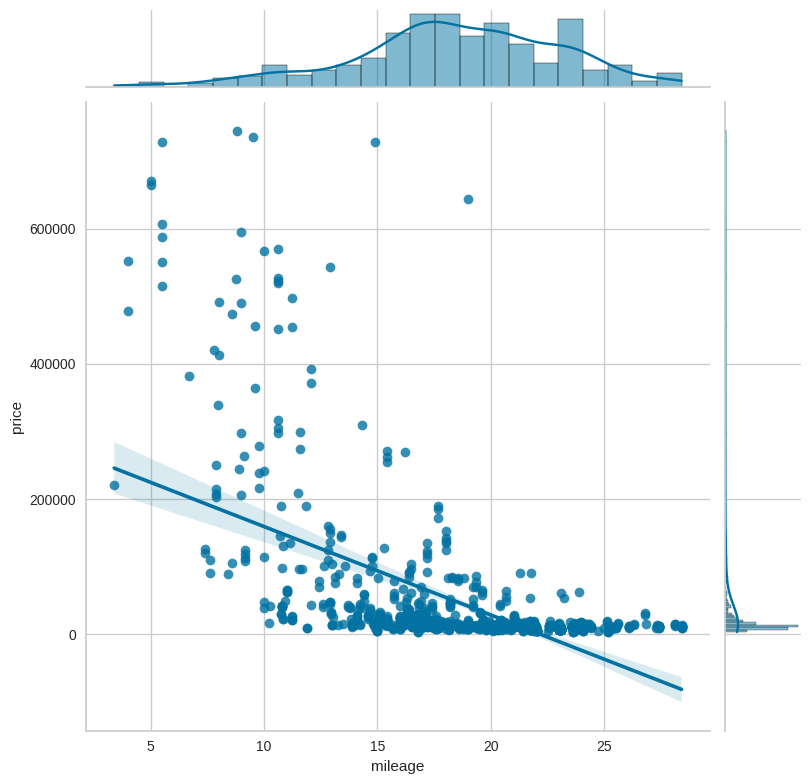

In [ ]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

### **Expensive cars tend to have worse mileage**

### **Pearson correlation grid**

<ipython-input-61-41213c43676a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



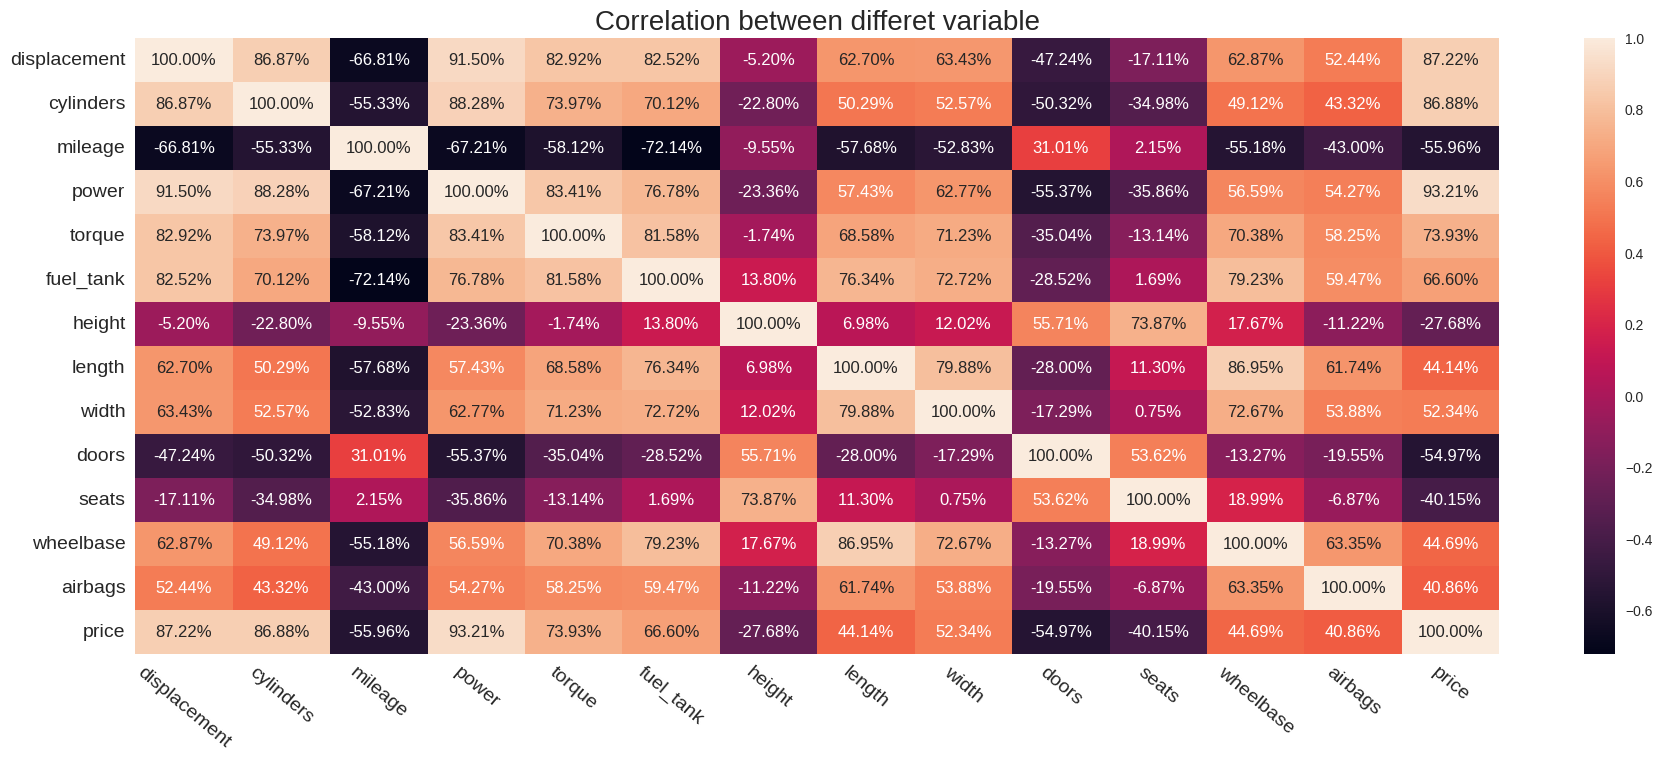

In [ ]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

### **Scatter plot grid**

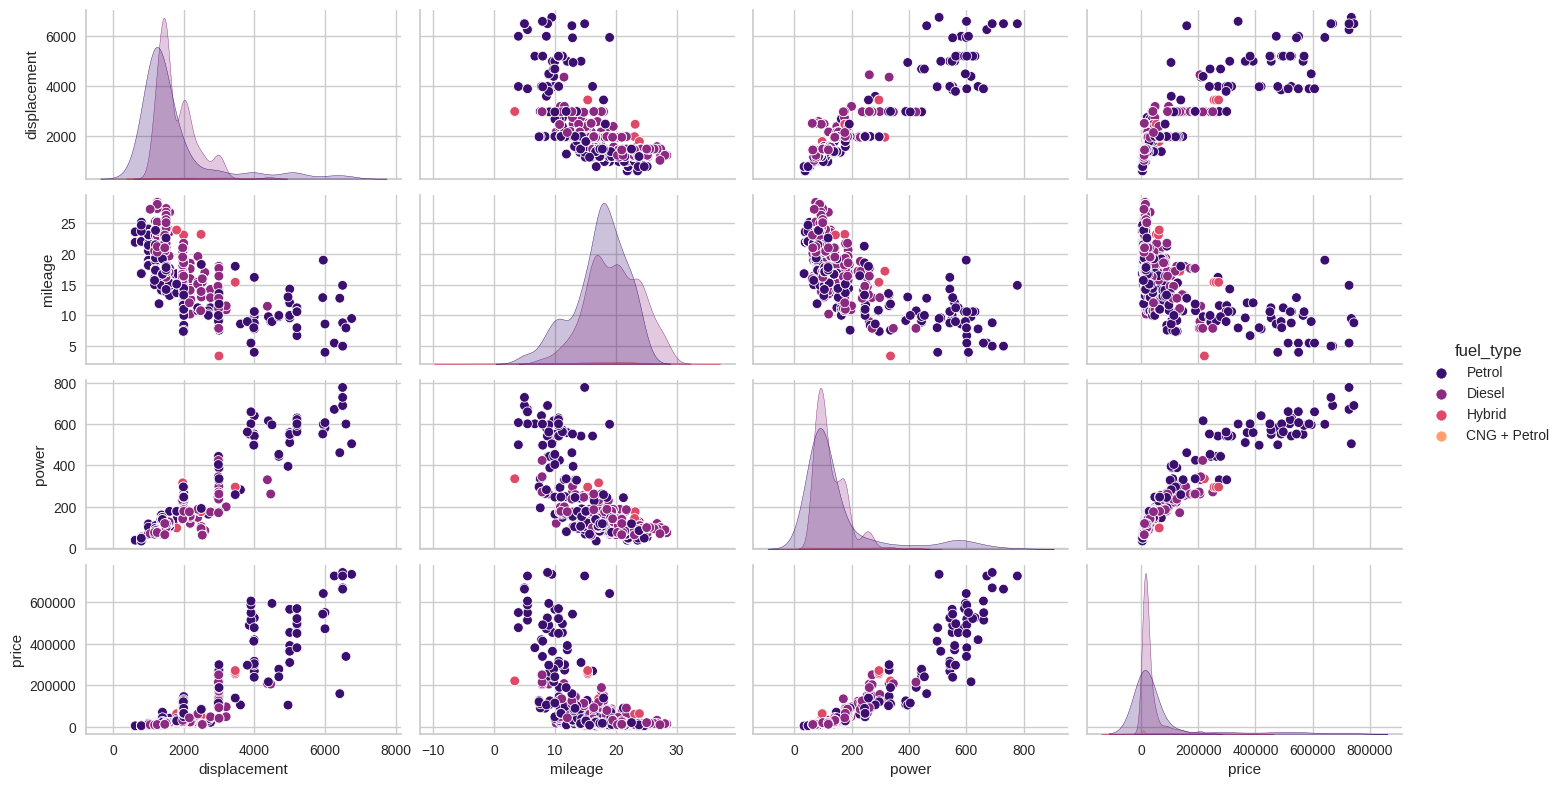

In [ ]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

### **Plot to show the previous plot and also adding the car manufacturer**

In [ ]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

### **Clear that we have to look to many dimensions in order to cluster the market, as the more features we explore the harder it's to cluster the market. These dimensions affect the decision of the buyers not to mention it also precvied totally different due to the very different mental models of buyers, in other words, price horsepower and mileage are not everything, some buyers would like to have a long wheel base car, some would like to have wider car all of the previous features, and more, strongly affect the buyer' decisions.**

### **This means that two car can have very similar price and milage but one is a van with lots of space and the other is just a four doors sedan, these two cars are precieved as two different categories in the automotive industry so space "length width and height of the car" can also be a vital factor.**

### **CLUSTERING**

In [ ]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [ ]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,...,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price,cluster
999,Maruti Suzuki,Baleno,Maruti Suzuki Baleno,1.3 Delta,Hatchback,Diesel,Injection,Manual,FWD (Front Wheel Drive),1248,...,37.0,1510.0,3995.0,1745.0,5,5,2520.0,2,10452,1
760,Honda,Amaze,Honda Amaze,Exclusive Edition Petrol,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1199,...,35.0,1501.0,3995.0,1695.0,4,5,2470.0,2,11116,1
729,Tata,Tigor,Tata Tigor,Revotron Xm,Sedan,Petrol,Injection,Manual,FWD (Front Wheel Drive),1199,...,35.0,1537.0,3992.0,1677.0,4,5,2450.0,0,8540,1
598,Porsche,911,Porsche 911,Carrera S,Coupe,Petrol,Injection,Automatic,AWD (All Wheel Drive),2981,...,64.0,1300.0,4519.0,1852.0,2,4,2450.0,4,243880,4
652,Maruti Suzuki,S-Presso,Maruti Suzuki S-Presso,Vxi (O) Ags,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),998,...,27.0,1549.0,3565.0,1520.0,5,5,2380.0,2,6741,1


### **Price vs Power**

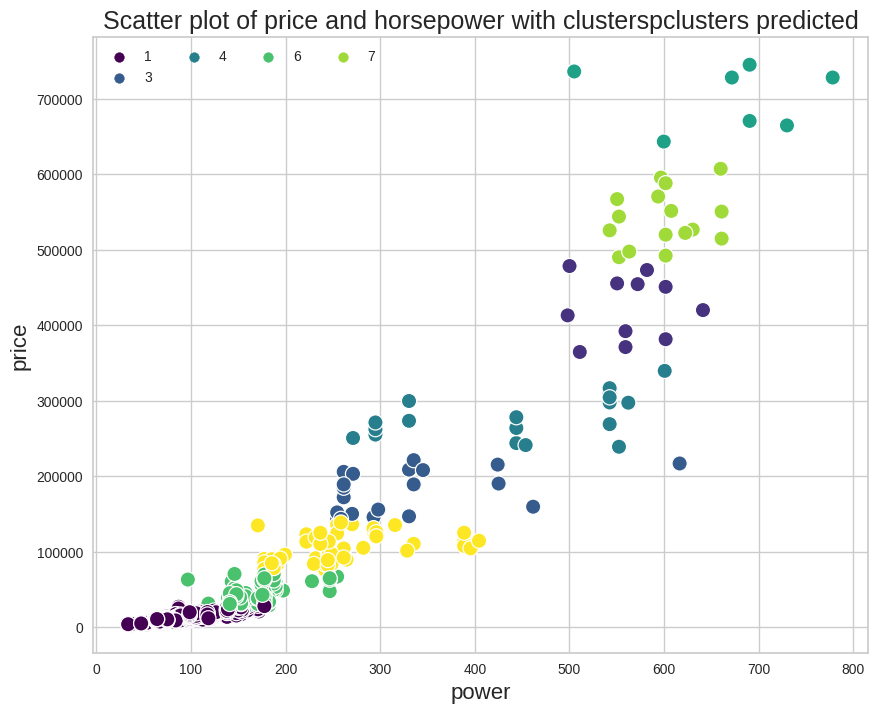

In [ ]:

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

### **Clusters are strongly affected by the price with clear seperation between clusters but it's kind of blurry when it comes to power**

### **Power vs Mileage**

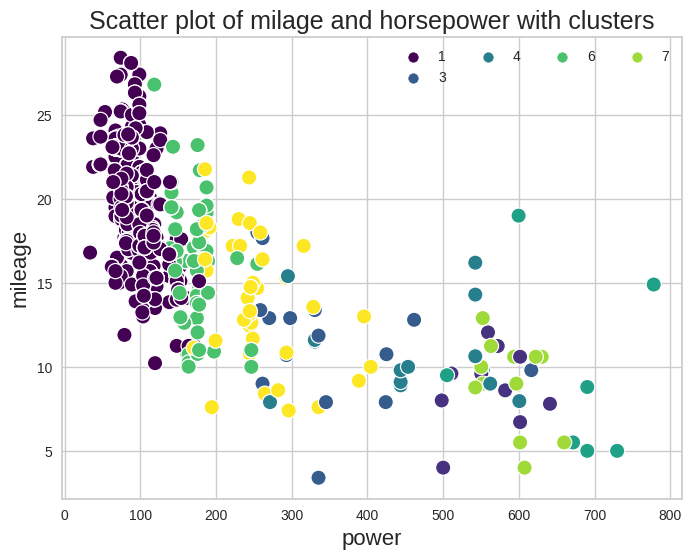

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power', y='mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

### **Clusters seperation in power is stronger than mileage which almost have no separation of clusters**

### **Engine size vs Fuel tank**

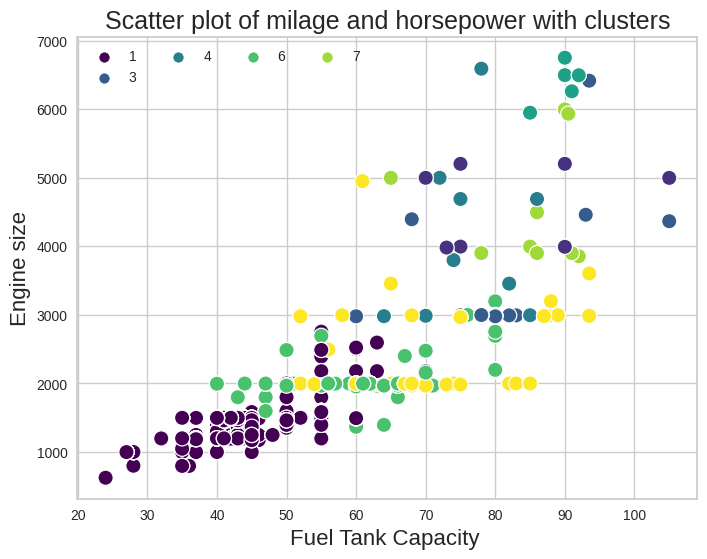

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fuel_tank', y='displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

### **3D scatter plot of price power, and mileage using also clusters**

In [ ]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

### **Average prices of each cluster**

<ipython-input-75-51d2069d3c76>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




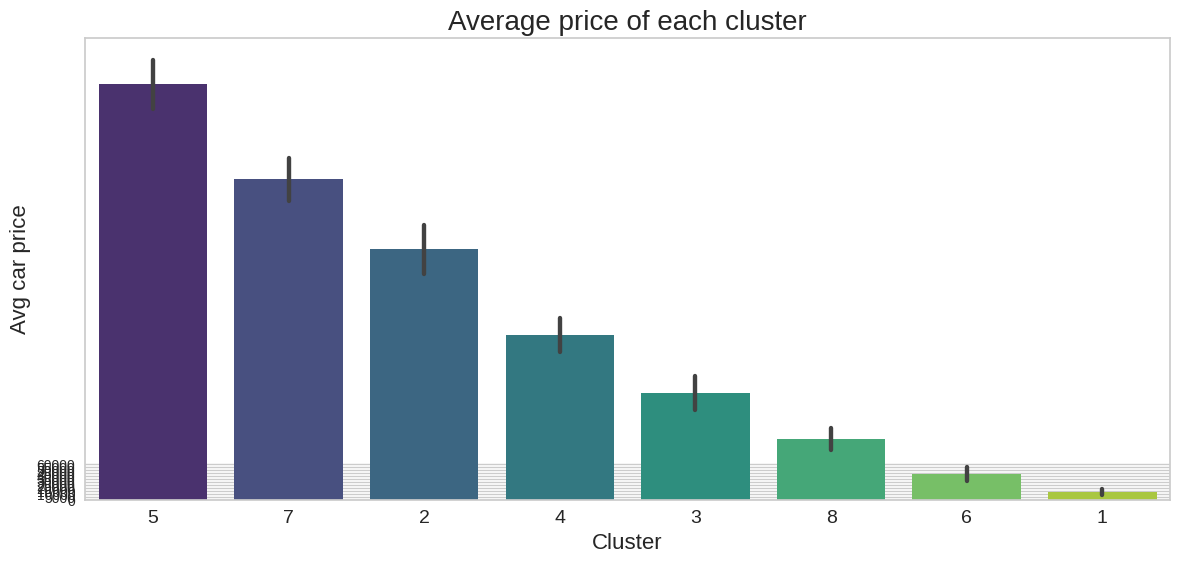

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);


### **As shown in the scatter plits earlier there is a clear seperation of clusters when it comes to prices**

### **How many cars exists in each cluster**

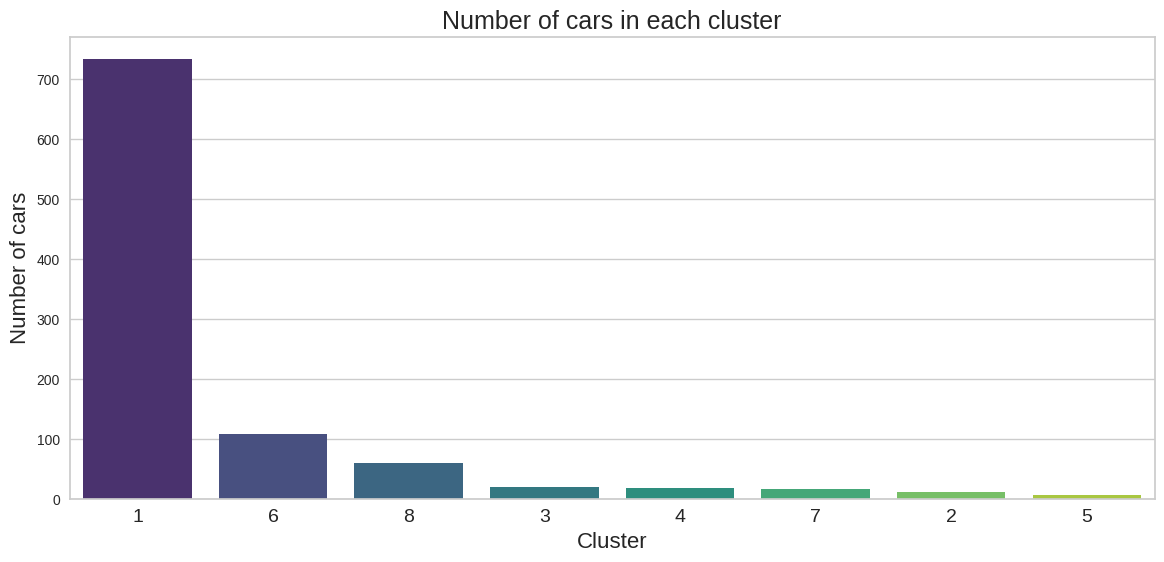

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

### **Useful Observation:With clustring there are too many variable taken in considration which are hard to be traced by normal methods. The clusters generated by the KMeans model can be used to identify what is the strategic group that form a strong competition to the company products in the market it also show the close clusters to this group which also can be put in considration in some cases.**